In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score,confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

In [2]:
 df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop(columns = 'Cabin',inplace=True)

In [7]:
df['Age'].fillna(df['Age'].mean(),inplace = True)

In [8]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [9]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace = True)

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

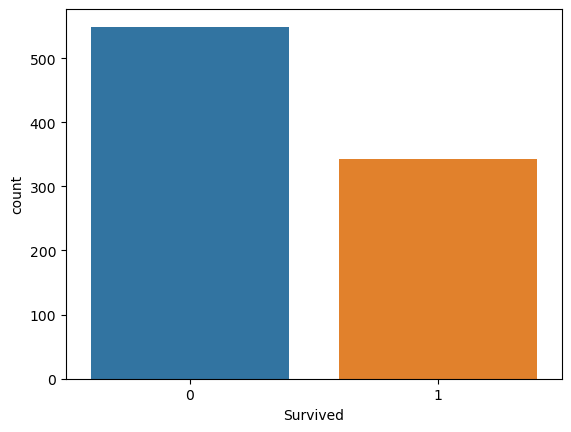

In [12]:
sns.countplot(x = df['Survived'])

In [13]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

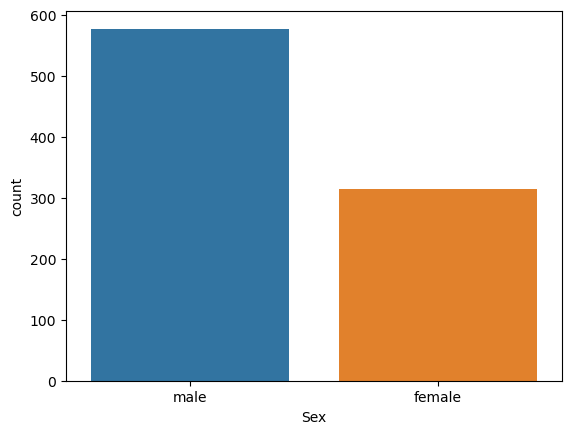

In [14]:
sns.countplot(x= df['Sex'])

<Axes: xlabel='Pclass', ylabel='count'>

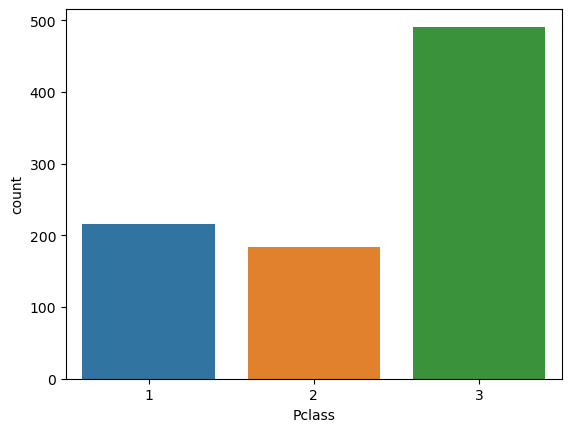

In [15]:
sns.countplot(x= df['Pclass'])

<Axes: xlabel='Age', ylabel='Count'>

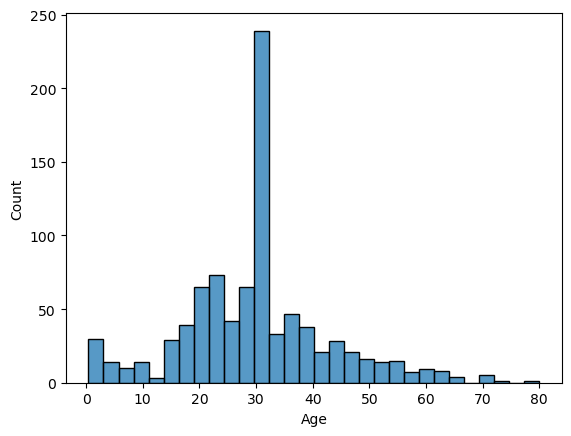

In [18]:
sns.histplot(df['Age'],kde=False)

<Axes: xlabel='Age', ylabel='Fare'>

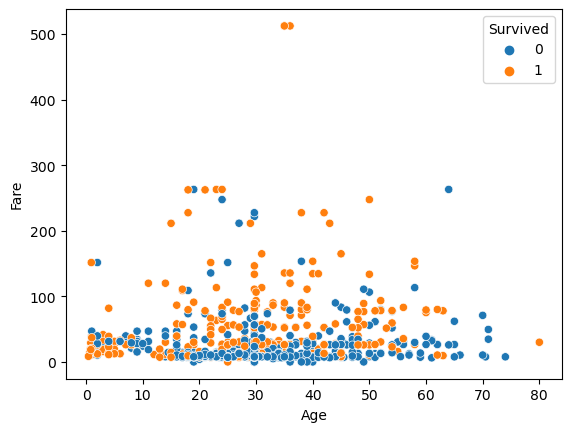

In [20]:
sns.scatterplot(data=df,x="Age",y="Fare",hue="Survived")

<Axes: xlabel='Survived', ylabel='Age'>

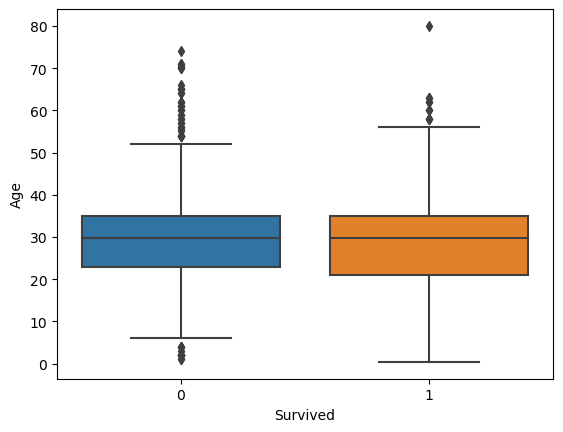

In [21]:
sns.boxplot(data=df,x="Survived",y="Age")

<Axes: xlabel='Pclass', ylabel='count'>

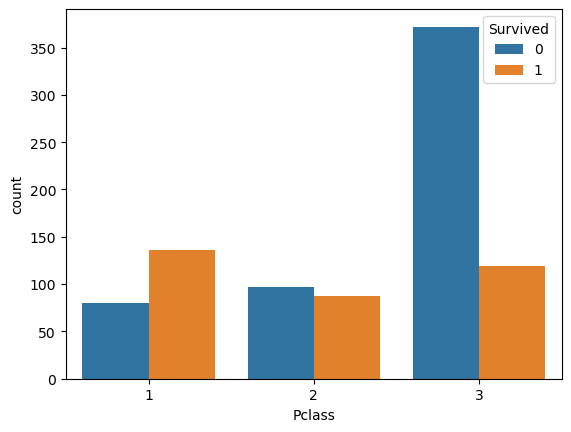

In [22]:
sns.countplot(x= 'Pclass', hue = 'Survived', data = df)

C:\Users\This pc\AppData\Local\Temp\ipykernel_6224\2084062177.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap = 'YlGnBu',annot = True)


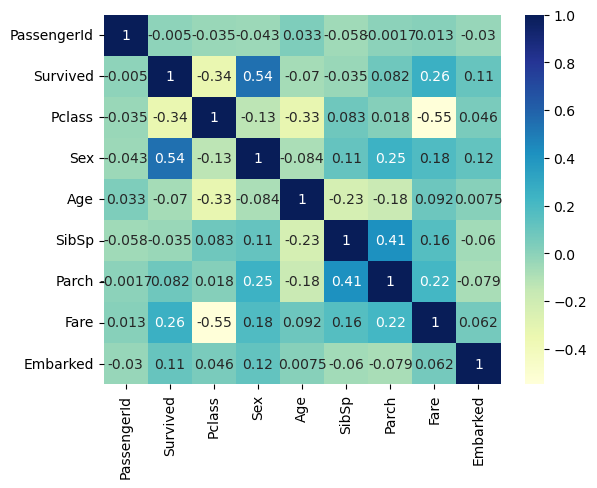

In [23]:
sns.heatmap(df.corr(),cmap = 'YlGnBu',annot = True)
plt.show()

In [24]:
df.replace({'Sex': {'male': 0, 'female': 1},'Embarked': {'S': 0, 'C': 1, 'Q': 2}},inplace = True)

In [25]:
X = df.drop(columns = ['Name','PassengerId','Survived','Ticket'],axis = 1)

In [26]:
Y = df['Survived']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
model = LogisticRegression()

In [29]:
model.fit(X_train,Y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [31]:
accuracy = accuracy_score(Y_train,pred_train)
print('accuracy of trained data is', accuracy)

accuracy of trained data is 0.8019662921348315


In [32]:
accuracy = accuracy_score(Y_test,pred_test)
print('accuracy of tested data is', accuracy)

accuracy of tested data is 0.7988826815642458


In [33]:
#Testing on the following classifiers
classifiers = [MultinomialNB(),
               RandomForestClassifier(),
               KNeighborsClassifier(), 
               SVC()]
for cls in classifiers:
    cls.fit(X_train, Y_train)

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "NaiveBayes", 1: "RandomForest", 2: "KNeighbours",3: "SVC"}

In [34]:
from sklearn.model_selection import cross_val_score
#Crossvalidation 
for i, model1 in enumerate(classifiers):
    cv_score = cross_val_score(model1, X_train,Y_train,scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))


NaiveBayes: 0.685407 
RandomForest: 0.790747 
KNeighbours: 0.668525 
SVC: 0.671303 


In [35]:
# Model Evaluation
# creating lists of varios scores
precision =[]
recall =[]
f1_score = []
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    pred_train = i.predict(X_train)
    pred_test = i.predict(X_test)
    prec = metrics.precision_score(Y_test, pred_test)
    recal = metrics.recall_score(Y_test, pred_test)
    f1_s = metrics.f1_score(Y_test, pred_test)
    train_accuracy = model1.score(X_train,Y_train)
    test_accuracy = model1.score(X_test,Y_test)
  
    #Appending scores
    precision.append(prec)
    recall.append(recal)
    f1_score.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)

In [36]:
# initialise data of lists.
data = {'Precision':precision,
'Recall':recall,
'F1score':f1_score,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}
# Creates pandas DataFrame.
Results = pd.DataFrame(data, index =["NaiveBayes", "RandomForest", "KNeighbours","SVC"])

In [37]:
import matplotlib.colors as colors
cmap2 = colors.ListedColormap(["#7fc97f","#E598D8"])
Results.style.background_gradient(cmap=cmap2)

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
NaiveBayes,0.745098,0.513514,0.608000,0.653631,0.669944
RandomForest,0.782609,0.729730,0.755245,0.653631,0.669944
KNeighbours,0.677966,0.540541,0.601504,0.653631,0.669944
SVC,0.750000,0.243243,0.367347,0.653631,0.669944


<function matplotlib.pyplot.show(close=None, block=None)>

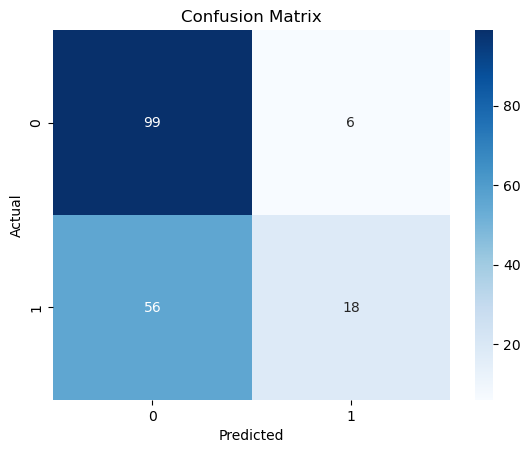

In [38]:
#Confusion matrix
con_matrix = confusion_matrix(Y_test,pred_test)
sns.heatmap(con_matrix,annot = True,fmt ='d',cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show